# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: [Lectures 9, 10](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Wednesday, Oct 25, 2021 at 11:59pm**

## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 2 | 8 |
| **Actual no disease**       | 0 | 100 |


- Model B

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 6 | 4 |
| **Actual no disease**       | 10 | 90 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

**We want to predict if someone has the disease, so the class disease is considered a true positive.**

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [2]:
results_dict = {"A": {}, "B": {}}

In [3]:
results_dict["A"]["accuracy"] = (100+2)/(100+2+8)
results_dict["B"]["accuracy"] = (90+6)/(6+4+10+90)



In [4]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [5]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [6]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.927273,0.872727


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

**I would choose model A based on the accuracy metric**

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [7]:
results_dict["A"]["precision"] = 2/2
results_dict["B"]["precision"] = 6/16
results_dict["A"]["recall"] = 2/10
results_dict["B"]["recall"] = 6/10
results_dict["A"]["f1"] = (2*1*2/10)/(1+2/10)
results_dict["B"]["f1"] = (2*0.375000*0.600000)/(0.375000+0.600000)




In [8]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [9]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [10]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [11]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [12]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [13]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


Show the dataframe with all results. 

In [14]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.927273,0.872727
precision,1.000000,0.375000
recall,0.200000,0.600000
f1,0.333333,0.461538


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

**1. The recall metric is more informative in this problem because recall tells us how many positive cases were identified. We want to have high recall because we want to find as many people with the disease as possible for treatment.**
\
**2. I would pick model B based on this information because it has the highest recall score**

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 4 to 5 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

**1. https://www.kaggle.com/nih-chest-xrays/sample: we would want to have a high recall because we want to find as many people with the disease as possible**
\
**2.https://www.kaggle.com/uciml/bioassay-datasets: we would want to have a high precision because we want to ensure that the compound actually binds to the target (i.e. want low false positives)**
\
**3.https://www.kaggle.com/mlg-ulb/creditcardfraud: we would want to have a high precision because we want to ensure that the predicted cases of fraud were actually fraud.**
\
**4.https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000: similar to #1, we want to have high recall to find as many people with skin cancer as possible.**

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [15]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [16]:
train_df["churn"].value_counts(normalize=True)

False    0.850407
True     0.149593
Name: churn, dtype: float64

**There appears to be a class imbalance where ~85% are false and ~15% are true. We would need to deal with this because we would get a very high accuracy score if we simple perform our typical modelling analysis (i.e. dummyclassifier will get accuracy of 85% (normally considered high even in other models, but this high accuracy is due to class imbalance). We need to perform further analysis beyond accuracy to determine how the effectively the model performs.**

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

In [17]:
# from pandas_profiling import ProfileReport
# df.profile_report()
result1 = df.groupby(["state", "international plan"]).size().reset_index(name='counts')
filterres = result1["international plan"] == "yes"
result1 = result1[filterres]
print(result1.sort_values("counts", ascending = False).iloc[0])

result2 =  df.groupby(["state", "voice mail plan"]).size().reset_index(name = "counts")
filterres = result2["voice mail plan"] == "yes"
result2 = result2[filterres]
print(result2.sort_values("counts", ascending = False).iloc[0])





state                  IL
international plan    yes
counts                 15
Name: 28, dtype: object
state               WV
voice mail plan    yes
counts              29
Name: 99, dtype: object


**1. Which states have the highest number of international plans? IL have the higher number of international plans**
\
**2. Which state have the the most voice call plans? WV have the high number of voice mail plans**

<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [18]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [19]:
# X_train.info()
numeric_features = ["number vmail messages", "total day minutes", "total day calls", "total day charge", "total eve minutes"
                    , "total eve calls", "total eve charge", "total night minutes", "total night calls", "total night charge"
                    , "total intl minutes", "total intl calls", "total intl charge", "customer service calls"
                   ]
categorical_features = ["state"]
ordinal_features = []
binary_features = ["international plan", "voice mail plan"]
passthrough_features = []
drop_features = ["account length", "area code", "phone number"]
target = "churn"

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(sparse=False, handle_unknown = "ignore"), categorical_features),
    (OneHotEncoder(drop = "if_binary"), binary_features),
    ("passthrough", passthrough_features),
    ("drop", drop_features),
)





**For numeric features, they need to be scaled to ensure that some features don't have as much effect as other due to numerical value.**
\
**For categorical features, they are one hot encoded because they won't work on the model standalone without encoding (i.e. we don't know what value to give them to model).**
\
**Both internation plan and voice mail plan have two states (yes or no) so they are binary features.**
\
**The drop features are all unneeded because they do not seem helpful in predicting churn. (i.e. area code can be represented with state, and phone number and account length does not have value to whether a customer churns).**

<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

In [20]:
transformed = preprocessor.fit_transform(X_train)

column_names = (numeric_features 
                + preprocessor.named_transformers_["onehotencoder-1"].get_feature_names().tolist()
                + ordinal_features
                + binary_features
                + passthrough_features
               )
pd.DataFrame(transformed, columns = column_names).head()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,...,x0_TX,x0_UT,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,international plan,voice mail plan
0,-0.587624,0.618769,-0.721211,0.618927,0.069871,-1.156734,0.069926,1.088667,0.052115,1.089926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.587624,-1.293778,1.655252,-1.293517,-1.167277,-1.207278,-1.166291,-2.162302,-0.720990,-2.164029,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.900976,-0.609809,0.169963,-0.609654,-2.210130,0.157417,-2.211244,0.369287,-0.463288,0.369252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.587624,0.998345,-0.473663,0.998611,-0.754894,0.258506,-0.755774,1.597736,0.000574,1.596582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.587624,-0.994886,0.764078,-0.994731,1.195994,-0.246937,1.196515,0.793839,0.206736,0.792921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<br><br>

### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new feature(s) were created to replace `area code`? 

In [21]:
df["area code"].unique()

array([415, 408, 510], dtype=int64)

**1. We want to use one-hot encoding because each area code is a category for a specific area**
\
**2.The possible values of area code are 415, 408, and 510**
\
**3.Three features will be created to replace area code, and the feature names will be each of the unique area codes. Those are binary categories (whether the phone number has the given area code or not).**

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any warnings the code produces (2 sentences max).

In [22]:
model = make_pipeline(
    preprocessor,
    DummyClassifier()
)

scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]

scores = cross_validate(
    model, X_train, y_train, return_train_score=True, scoring=scoring
)
pd.DataFrame(scores)

C:\Users\Johnn\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Johnn\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Johnn\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Johnn\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_cl

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.015957,0.032913,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
1,0.018949,0.010970,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
2,0.015625,0.015622,0.850107,0.850482,0.0,0.0,0.0,0.0,0.0,0.0
3,0.015659,0.014132,0.851931,0.850027,0.0,0.0,0.0,0.0,0.0,0.0
4,0.010051,0.000000,0.849785,0.850562,0.0,0.0,0.0,0.0,0.0,0.0


**The code results in valid accuracy scores, however, recall, precision, and f1 scores are all zero  and we get that they are all ill-defined and we need to use the zero_division parameter to control the behaviour. This means that there is a zero division occuring**

<br><br>

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

In [23]:
model = make_pipeline(
    preprocessor,
    LogisticRegression()
)

scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]

scores = cross_validate(
    model, X_train, y_train, return_train_score=True, scoring=scoring
)
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.150151,0.016953,0.860814,0.862808,0.315789,0.329843,0.214286,0.225806,0.600000,0.611650
1,0.055852,0.026926,0.850107,0.870847,0.270833,0.374026,0.185714,0.258065,0.500000,0.679245
2,0.048870,0.009974,0.843683,0.867631,0.215054,0.365039,0.142857,0.254480,0.434783,0.645455
3,0.073807,0.016947,0.862661,0.862346,0.333333,0.335917,0.231884,0.232143,0.592593,0.607477
4,0.039544,0.015623,0.847639,0.866095,0.268041,0.362245,0.185714,0.254480,0.481481,0.628319


**The f1 scores for the logistic model are quite low, which indicate that the recall and preicion are low as well. Specifically, in the lr model, the precision is much higher than recall which means that the chance that a positive prediction is actually predict is high, however, we are not getting a lot of the positive cases. Since we cannot compare the result to the dummyclassifier (due to zero division with dummy classifier), we cannot comment on whether we are satisfied with the results or not.**

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [24]:
model = make_pipeline(
    preprocessor,
    LogisticRegression(class_weight = "balanced")
)

scoring = [
    "accuracy",
    "f1",
    "recall",
    "precision",
]

scores = cross_validate(
    model, X_train, y_train, return_train_score=True, scoring=scoring
)
pd.DataFrame(scores)

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,0.095745,0.022939,0.785867,0.770096,0.484536,0.501742,0.671429,0.774194,0.379032,0.371134
1,0.094024,0.022722,0.764454,0.773848,0.485981,0.504695,0.742857,0.770609,0.361111,0.375218
2,0.089369,0.025938,0.760171,0.777063,0.445545,0.515152,0.642857,0.792115,0.340909,0.381693
3,0.095092,0.025929,0.746781,0.776647,0.458716,0.516802,0.724638,0.796429,0.335570,0.382504
4,0.082846,0.016673,0.731760,0.784681,0.444444,0.523697,0.714286,0.792115,0.322581,0.391150


**Compare to the previous part, the f1 scores are higher in LR with "balanced" class weight. Specifically, recall is much higher in this model compared to the last model which means we are correctly predicting and finding more of the positive cases. Since we want to find customer churn, we would want to use this model to find the positive cases for churn.**

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [25]:
np.random.seed(1)

C_vals = 10.0 ** np.arange(-1.5, 2, 0.5)
class_weight = [None, "balanced"]

param_grid = {
    "logisticregression__class_weight": class_weight,
    "logisticregression__C":C_vals.tolist()
}

pipe_svm = make_pipeline(
        preprocessor,
        LogisticRegression(max_iter=1000),
    )

grid_search = GridSearchCV(
    model, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring = "f1"
)

grid_search.fit(X_train, y_train)

print("The best score is: ", grid_search.best_score_, " and the best parameters are: ", grid_search.best_params_)

The best score is:  0.48253138365262965  and the best parameters are:  {'logisticregression__C': 0.1, 'logisticregression__class_weight': 'balanced'}


<br><br>

### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

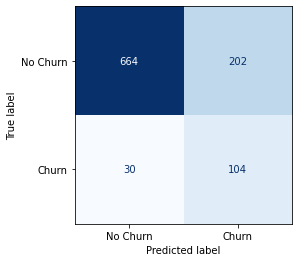

In [26]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

disp = plot_confusion_matrix(
    grid_search,
    X_test,
    y_test,
    display_labels=["No Churn", "Churn"],
    values_format="d",
    cmap=plt.cm.Blues,
    colorbar=False,
);





In [27]:
print(
    classification_report(
        y_test, grid_search.predict(X_test), target_names=["No Churn", "Churn"]
    )
)

              precision    recall  f1-score   support

    No Churn       0.96      0.77      0.85       866
       Churn       0.34      0.78      0.47       134

    accuracy                           0.77      1000
   macro avg       0.65      0.77      0.66      1000
weighted avg       0.87      0.77      0.80      1000



Average precision of logistic regression: 0.461


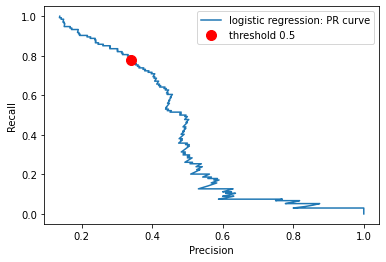

In [28]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, grid_search.predict_proba(X_test)[:, 1]
)
plt.plot(precision, recall, label="logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, grid_search.predict(X_test)),
    recall_score(y_test, grid_search.predict(X_test)),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");


ap_lr = average_precision_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("Average precision of logistic regression: {:.3f}".format(ap_lr))

AUC for LR: 0.825


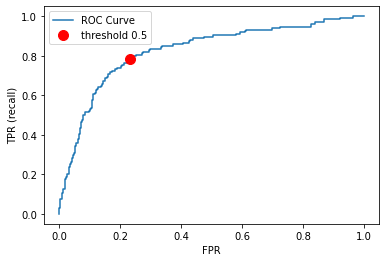

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

default_threshold = np.argmin(np.abs(thresholds - 0.5))

plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");


roc_lr = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("AUC for LR: {:.3f}".format(roc_lr))

**This model has a high recall score (which means it is good at finding many actual positive cases). It can also have a high precision score, but the tradeoff between recall and precision is very high (as seen by the precision/recall curve). At the current settings, the model predicts a large amount of false positives. The AUC score is quite high which means that positive points have a higher score than negative points most of the time.**

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [30]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [31]:
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=123)

print(train_df.info())
# Don't need the following (scaling) because this is regression 
# numeric_features = ["MedInc", "HouseAge", "AveRooms", "AveBedroms", "Population", "AveOccup", "Latitude", "Longitude"]

# preprocessor = make_column_transformer(
#     (StandardScaler(), numeric_features)
# )

target = "MedHouseVal"
X_train, y_train = train_df.drop(columns = target), train_df[target]
X_test, y_test = test_df.drop(columns = target), test_df[target]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 9950 to 19966
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB
None


<br><br>

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

In [32]:
model = DummyRegressor()

scores = cross_validate(
    model, X_train, y_train, return_train_score = True, scoring = None
)

scores = pd.DataFrame(scores)
scores


,fit_time,score_time,test_score,train_score
0,0.003992,0.000998,-0.000023,0.0
1,0.003990,0.000997,-0.000576,0.0
2,0.000994,0.000997,-0.000061,0.0
3,0.001994,0.000000,-0.000015,0.0
4,0.001995,0.000996,-0.000058,0.0


**The mean is used as default scoring. In cross_validate, default scoring is None**

<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [33]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

In [34]:
ridge_scores = cross_validate(models["Ridge"], X_train, y_train, return_train_score = True, scoring = score_types_reg)
random_forest_scores = cross_validate(models["Random Forest"], X_train, y_train, return_train_score = True, scoring = score_types_reg)
ridge_scores = pd.DataFrame(ridge_scores)
print(ridge_scores)
random_forest_scores = pd.DataFrame(random_forest_scores)
print(random_forest_scores)

   fit_time  score_time  test_neg_mean_squared_error  \
0  0.007979    0.005984                    -0.543751   
1  0.015957    0.006984                    -0.523148   
2  0.006984    0.004985                    -0.530821   
3  0.017951    0.006982                    -0.526317   
4  0.003990    0.002990                    -1.293127   

   train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
0                     -0.523434                         -0.737395   
1                     -0.526913                         -0.723289   
2                     -0.524935                         -0.728575   
3                     -0.526141                         -0.725477   
4                     -0.520423                         -1.137158   

   train_neg_root_mean_squared_error  test_neg_mean_absolute_error  \
0                          -0.723487                     -0.537744   
1                          -0.725888                     -0.538832   
2                          -0.724524  

**Comparing the MSE, RMSE, RMAE, R-squared, and mape, the random forest model performed better when compared to ridge. Compared to dummy model, both random forest and ridge performed better.**

<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?

In [35]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

In [36]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
R2_score = best_model.score(X_test, y_test)
mape_score = mape(y_test, best_model.predict(X_test))

In [37]:
print("The R^2 score is:", R2_score)
print("The mape score is:", mape_score*-1)

The R^2 score is: 0.812193768442624
The mape score is: -18.232851960797213


**The mape score is similar to that of the cross validation results (-18.406578488809707 for test, ~-18 for cross validation)**
\
**The R^2 score is also similar to that of cross validation (0.81 for test, about 0.805 for cross validate)**

<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

In [38]:
ridge_model = models["Ridge"].fit(X_train, y_train)
lr_preds = ridge_model.predict(X_test)
# print(ridge_model.coef_)


features = ["MedInc", "HouseAge", "AveRooms", "AveBedroms", "Population", "AveOccup", "Latitude", "Longitude"]
df = pd.DataFrame(
    data={
        "features": features,
        "coefficients": ridge_model.coef_
    }
)
print(df)

     features  coefficients
0      MedInc      0.439862
1    HouseAge      0.009160
2    AveRooms     -0.111587
3  AveBedroms      0.646611
4  Population     -0.000007
5    AveOccup     -0.003923
6    Latitude     -0.417019
7   Longitude     -0.427645


**Increasing median income, house age, average bedrooms will result in an increased housing price**

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 